In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'E:\download\kaggle_data_set\toko_sembako\penjualan barang.csv', sep = ';')

In [3]:
df.head()

,Unnamed: 0,tanggal,nama_pembeli,nama_barang,kuantum,nominal
0,1,02/01/2020,TOKO HERUNIAWATI,BERAS,1000.0,9840000.0
1,2,02/01/2020,TOKO HERUNIAWATI,DAGING,120.0,8400000.0
2,3,02/01/2020,TOKO APRILIA SUKRISNI,BERAS,6000.0,62910000.0
3,4,02/01/2020,TOKO APRILIA SUKRISNI,MIGOR,408.0,4855200.0
4,5,02/01/2020,TOKO APRILIA SUKRISNI,TEPUNG,140.0,1162000.0


In [4]:
df.columns

Index(['Unnamed: 0', 'tanggal', 'nama_pembeli', 'nama_barang', 'kuantum',
       'nominal'],
      dtype='object')

In [5]:
df.isna().sum()

Unnamed: 0      0
tanggal         0
nama_pembeli    0
nama_barang     0
kuantum         0
nominal         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1289 non-null   int64  
 1   tanggal       1289 non-null   object 
 2   nama_pembeli  1289 non-null   object 
 3   nama_barang   1289 non-null   object 
 4   kuantum       1289 non-null   float64
 5   nominal       1289 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 60.5+ KB


In [7]:
df1 = df.copy()
df1.drop(['Unnamed: 0','nama_pembeli','nama_barang','kuantum'], axis = 1, inplace = True)
df1

,tanggal,nominal
0,02/01/2020,9840000.0
1,02/01/2020,8400000.0
2,02/01/2020,62910000.0
3,02/01/2020,4855200.0
4,02/01/2020,1162000.0
...,...,...
1284,08/04/2021,4389600.0
1285,08/04/2021,2718750.0
1286,08/04/2021,1065120.0
1287,09/04/2021,1200000.0


In [8]:
df1[['hari','bulan','tahun']] = df1['tanggal'].str.split('/', expand = True)

In [9]:
train = df1[df1['tahun']=='2020']
train = train.drop(['hari','bulan'], axis = 1)
train = train.groupby('tanggal')['nominal'].mean().reset_index()
train['tanggal'] = pd.to_datetime(train['tanggal'], dayfirst = True)
train['nominal'] = train['nominal'].astype(int)
train = train.sort_values(by = 'tanggal')

In [10]:
test = df1[df1['tahun']=='2021']
test = test.drop(['hari','bulan'], axis = 1)
test = test.groupby('tanggal')['nominal'].mean().reset_index()
test['tanggal'] = pd.to_datetime(test['tanggal'], dayfirst = True)
test['nominal'] = test['nominal'].astype(int)
test = test.sort_values(by = 'tanggal')

In [11]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 2 to 147
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tanggal  151 non-null    datetime64[ns]
 1   nominal  151 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 2.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 7 to 12
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tanggal  34 non-null     datetime64[ns]
 1   nominal  34 non-null     int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 680.0 bytes


(None, None)

In [12]:
import matplotlib.pyplot as plt

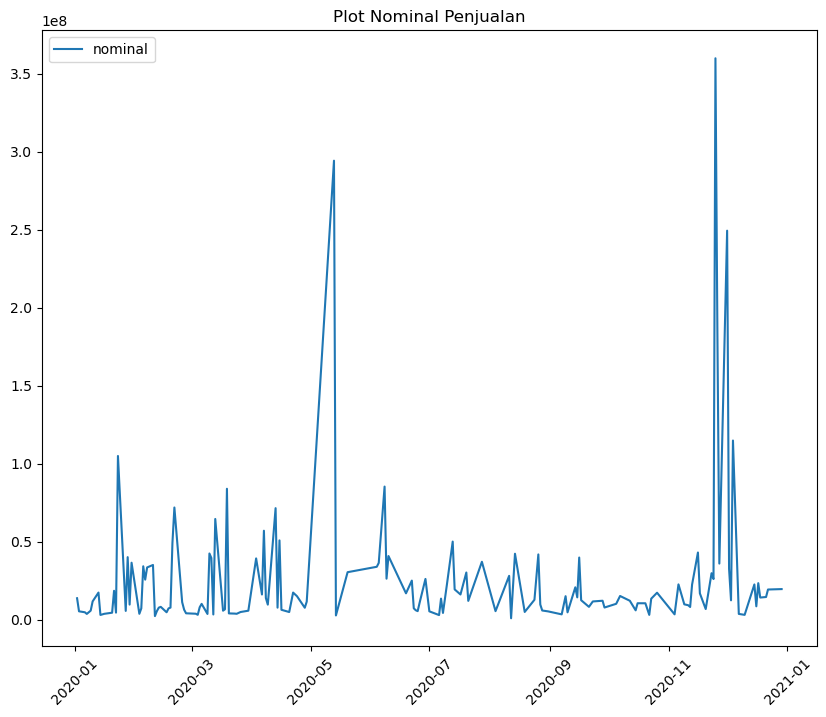

In [13]:
plt.figure(figsize = (10,8))
plt.plot(train['tanggal'], train['nominal'], label = 'nominal')
plt.xticks(rotation=45)
plt.title('Plot Nominal Penjualan')
plt.legend()
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller

def ad_test(data):
    dftest = adfuller(data, autolag = 'AIC')
    print(f'1. ADF : {dftest[0]}')
    print(f'2. P-value : {dftest[1]}')
    print(f'3. Lags : {dftest[2]}')
    print('4. nilai kritis :')
    for key, val in dftest[4].items():
        print('\t', key, ': ',val)

In [15]:
ad_test(train['nominal'])

1. ADF : -4.81129910800512
2. P-value : 5.1742826643432356e-05
3. Lags : 3
4. nilai kritis :
	 1% :  -3.4756368462466662
	 5% :  -2.8814104466172608
	 10% :  -2.5773652982553568


In [16]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [17]:
model_terbaik = auto_arima(train['nominal'], trace = True, 
                          suppres_warnings = True)
model_terbaik.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=5759.165, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5762.924, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5760.885, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5761.671, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5801.324, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=5761.149, Time=0.49 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5760.158, Time=0.85 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=5752.282, Time=0.45 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=5750.785, Time=0.26 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=5750.537, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=5760.487, Time=0.11 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=5749.662, Time=0.20 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=5751.688, Time=0.24 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=5751.674, Time=0.37 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  151
Model:               SARIMAX(4, 0, 0)   Log Likelihood               -2868.831
Date:                Sat, 16 Dec 2023   AIC                           5749.662
Time:                        22:15:46   BIC                           5767.766
Sample:                             0   HQIC                          5757.017
                                - 151                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    1.59e+07   7.94e-10      2e+16      0.000    1.59e+07    1.59e+07
ar.L1          0.1435      0.045      3.157      0.002       0.054       0.233
ar.L2          0.0959      0.091      1.052      0.293      -0.083       0.274
ar.L3          0.2856      0.054      5.269      0.000       0.179       0.392
ar.L4         -0.1382      0.100     -1.379      0.168      -0.335       0.058
sigma2        1.9e+15   5.71e-17   3.33e+31      0.000     1.9e+15     1.9e+15
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7755.03
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               5.02   Skew:                             5.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.14e+46. Standard errors may be unstable.
"""

In [18]:
import statsmodels.api as sm

In [19]:
model = sm.tsa.ARIMA(test['nominal'], order=(4, 0, 0))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                nominal   No. Observations:                   34
Model:                 ARIMA(4, 0, 0)   Log Likelihood                -587.035
Date:                Sat, 16 Dec 2023   AIC                           1186.070
Time:                        22:15:46   BIC                           1195.228
Sample:                             0   HQIC                          1189.193
                                 - 34                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.301e+06   3.25e+06      2.554      0.011    1.93e+06    1.47e+07
ar.L1          0.3265      0.174      1.873      0.061      -0.015       0.668
ar.L2         -0.1097      0.569     -0.193      0.8

In [20]:
forecast = result.get_forecast(steps=len(test))
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

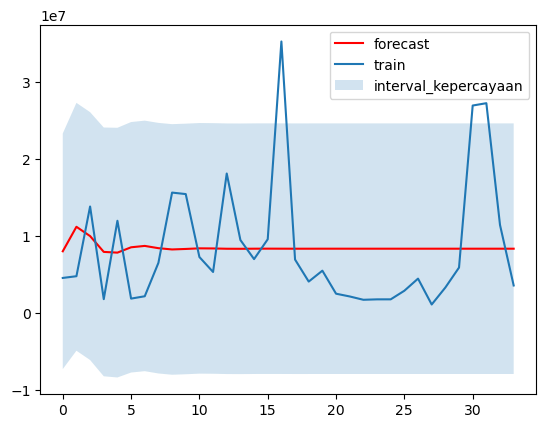

In [21]:
plt.plot(range(len(forecast_values)), forecast_values, c = 'red', label = 'forecast')
plt.plot(range(len(test)), test['nominal'], label = 'train')
plt.fill_between(range(len(test)), conf_int.iloc[:, 0], conf_int.iloc[:, 1], alpha=0.2, label='interval_kepercayaan')
plt.legend()
plt.show()

Ada beberapa faktor yang menyebabkan kurang baiknya pemodelan arima diataranya:
    1. adanya outlier pada data. hal ini bisa dilihat dari adanya beberapa data yang cukup extrim perbedaannya
    2. kecilnya ukuran sampel yang digunakan untuk melatih model. sehingga membuat arima kurang baik dalam menangkap pola dan   tren ynag ada pada data
solusinaya perlunya melaukan penangan pada outlier dan menambah data train untuk melatih model